In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Data/temp_data-AllYears.csv')
dataset.head()

,Year,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,14.867167,0.308167
1,1851,14.991833,0.312083
2,1852,15.006500,0.316417
3,1853,14.955167,0.283833
4,1854,14.991000,0.276417


In [3]:
# Let X be world population and y be global average yearly temperature, then Reshape X and y
X = dataset['Year'].values.reshape(-1,1)
y = dataset['LandAndOceanAverageTemperature'].values.reshape(-1,1)

In [4]:
# split the train - test data to be 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Train the algorithm using a linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#To retrieve the intercept:
print("The y intercept is:  ", regressor.intercept_)
#For retrieving the slope:
print("The slope is:  ", regressor.coef_)

The y intercept is:   [5.03304052]
The slope is:   [[0.00527395]]


In [7]:
# Make predictions
y_pred = regressor.predict(X_test)

In [8]:
# Compare actual to predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), "Error": y_pred.flatten() - y_test.flatten()})
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
df

,Actual,Predicted,Error
0,15.854417,15.649500,-0.204917
1,15.344167,15.496555,0.152388
2,15.345000,15.280323,-0.064677
3,14.954667,15.079913,0.125246
4,15.600333,15.575664,-0.024669
5,14.810417,15.074639,0.264222
6,14.758250,14.826764,0.068514
7,15.021083,14.816216,-0.204868
8,15.340667,15.501829,0.161162
9,14.776000,15.111557,0.335557


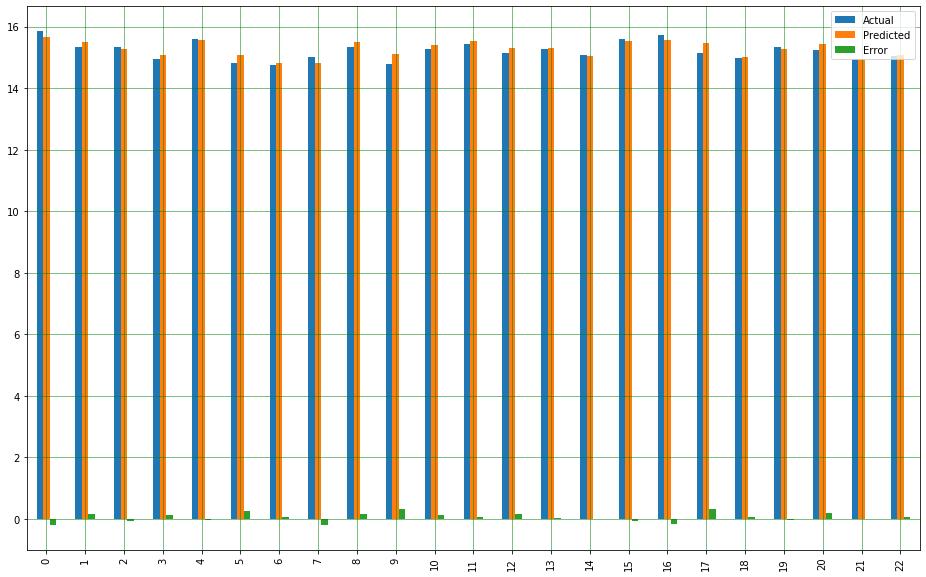

In [9]:
# Create a bar chart to show comparison between actual and predicted
df1 = df.head(23)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

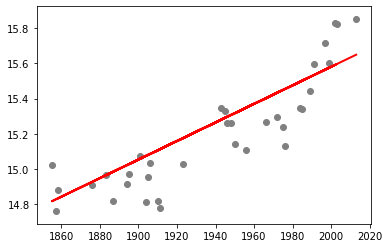

In [10]:
# Plot our straight line with the test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [11]:
# Calculate margin or error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13596173454789362
Mean Squared Error: 0.027025730486877658
Root Mean Squared Error: 0.16439504398514468


In [12]:
x_min = X.min()
x_max = X.max()
print("Min/Max X values (Year)", x_min, x_max)

Min/Max X values (Year) 1850 2015


In [13]:
# Get y (temperature min and max actuals)
y_min_actual = y.min()
y_max_actual = y.max()
print("Min/Max Y values (Temperature)", y_min_actual, y_max_actual)

Min/Max Y values (Temperature) 14.740083333333333 16.058583333333335


In [14]:
#The y intercept is:   [-19.62893083]
#The slope is:   [[0.0176583]]
y_min = -19.62893083 + 0.0176583 * x_min
y_max = -19.62893083 + 0.0176583 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 14.740083333333333
Calculated Min Value: 13.038924169999994
Actual Max Value: 16.058583333333335
Calculated Max Value: 15.952543669999997


In [15]:
# Predict calculated values
y_min_predicted = regressor.predict([[x_min]])
y_max_predicted = regressor.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 14.740083333333333
Predicted Min Value: [[14.78984586]]
Actual Max Value: 16.058583333333335
Predicted Max Value: [[15.66004742]]


Text(0, 0.5, 'Temperature (Celsius)')

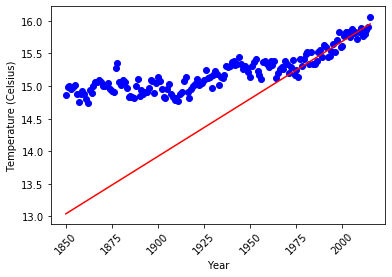

In [16]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
